## Линейное программирование

In [1]:
# Подключение пакетов:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
using JuMP
using GLPK

   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`


In [2]:
# Определение объекта модели с именем model:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [3]:
# Определение переменных x, y и граничных условий для них:
@variable(model, x >= 0)
@variable(model, y >= 0)

y

In [4]:
# Определение ограничений модели:
@constraint(model, 6x + 8y >= 100)
@constraint(model, 7x + 12y >= 120)

7 x + 12 y >= 120

In [5]:
# Определение целевой функции:
@objective(model, Min, 12x + 20y)

12 x + 20 y

In [6]:
# Вызов функции оптимизации:
optimize!(model)

In [7]:
# Определение причины завершения работы оптимизатора:
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [8]:
# Демонстрация первичных результирующих значений переменных x и y:
@show value(x);
@show value(y);
# Демонстрация результата оптимизации:
@show objective_value(model);

value(x) = 14.999999999999993
value(y) = 1.2500000000000047
objective_value(model) = 205.0


##  Векторизованные ограничения и целевая функция оптимизации

In [9]:
# Подключение пакетов:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
using JuMP
using GLPK

   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`


In [10]:
# Определение объекта модели с именем vector_model:
vector_model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [11]:
# Определение начальных данных:
A= [ 1 1 9 5;
    3 5 0 8;
    2 0 6 13]
b = [7; 3; 5]
c = [1; 3; 5; 2]

4-element Vector{Int64}:
 1
 3
 5
 2

In [12]:
# Определение вектора переменных:
@variable(vector_model, x[1:4] >= 0)

4-element Vector{VariableRef}:
 x[1]
 x[2]
 x[3]
 x[4]

In [13]:
# Определение ограничений модели:
@constraint(vector_model, A * x .== b)

3-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 x[1] + x[2] + 9 x[3] + 5 x[4] == 7
 3 x[1] + 5 x[2] + 8 x[4] == 3
 2 x[1] + 6 x[3] + 13 x[4] == 5

In [14]:
# Определение целевой функции:
@objective(vector_model, Min, c' * x)

x[1] + 3 x[2] + 5 x[3] + 2 x[4]

In [15]:
# Вызов функции оптимизации:
optimize!(vector_model)

In [16]:
# Определение причины завершения работы оптимизатора:
termination_status(vector_model)

OPTIMAL::TerminationStatusCode = 1

In [17]:
# Демонстрация результата оптимизации:
@show objective_value(vector_model);

objective_value(vector_model) = 4.9230769230769225


## Оптимизация рациона питания

In [18]:
# Подключение пакетов:
import Pkg
Pkg.add("JuMP")
Pkg.add("GLPK")
using JuMP
using GLPK

   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`


In [19]:
# Контейнер для хранения данных об ограничениях на количество потребляемых калорий, белков, жиров и соли:
category_data = JuMP.Containers.DenseAxisArray(
    [1800 2200;
    91 Inf;
    0 65;
    0 1779],
    ["calories", "protein", "fat", "sodium"],
    ["min", "max"])

2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
    Dimension 2, ["min", "max"]
And data, a 4×2 Matrix{Float64}:
 1800.0  2200.0
   91.0    Inf
    0.0    65.0
    0.0  1779.0

In [20]:
# массив данных с наименованиями продуктов:
foods = ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza","salad", "milk", "ice cream"]

9-element Vector{String}:
 "hamburger"
 "chicken"
 "hot dog"
 "fries"
 "macaroni"
 "pizza"
 "salad"
 "milk"
 "ice cream"

In [21]:
# Массив стоимости продуктов:
cost = JuMP.Containers.DenseAxisArray(
    [2.49, 2.89, 1.50, 1.89, 2.09, 1.99, 2.49, 0.89, 1.59],foods)

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
And data, a 9-element Vector{Float64}:
 2.49
 2.89
 1.5
 1.89
 2.09
 1.99
 2.49
 0.89
 1.59

In [22]:
# Массив данных о содержании калорий, белков, жиров и соли в продуктах питания:
food_data = JuMP.Containers.DenseAxisArray(
    [410 24 26 730;
    420 32 10 1190;
    560 20 32 1800;
    380 4 19 270;
    320 12 10 930;
    320 15 12 820;
    320 31 12 1230;
    100 8 2.5 125;
    330 8 10 180],
    foods,
    ["calories", "protein", "fat", "sodium"])

2-dimensional DenseAxisArray{Float64,2,...} with index sets:
    Dimension 1, ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
    Dimension 2, ["calories", "protein", "fat", "sodium"]
And data, a 9×4 Matrix{Float64}:
 410.0  24.0  26.0   730.0
 420.0  32.0  10.0  1190.0
 560.0  20.0  32.0  1800.0
 380.0   4.0  19.0   270.0
 320.0  12.0  10.0   930.0
 320.0  15.0  12.0   820.0
 320.0  31.0  12.0  1230.0
 100.0   8.0   2.5   125.0
 330.0   8.0  10.0   180.0

In [23]:
# Определение объекта модели с именем model:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [24]:
# Определим массив:
categories = ["calories", "protein", "fat", "sodium"]

4-element Vector{String}:
 "calories"
 "protein"
 "fat"
 "sodium"

In [25]:
# Определение переменных:
@variables(model, begin
    category_data[c, "min"] <= nutrition[c = categories] <= category_data[c, "max"]
    # Сколько покупать продуктов:
    buy[foods] >= 0
end)

(1-dimensional DenseAxisArray{VariableRef,1,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
And data, a 4-element Vector{VariableRef}:
 nutrition[calories]
 nutrition[protein]
 nutrition[fat]
 nutrition[sodium], 1-dimensional DenseAxisArray{VariableRef,1,...} with index sets:
    Dimension 1, ["hamburger", "chicken", "hot dog", "fries", "macaroni", "pizza", "salad", "milk", "ice cream"]
And data, a 9-element Vector{VariableRef}:
 buy[hamburger]
 buy[chicken]
 buy[hot dog]
 buy[fries]
 buy[macaroni]
 buy[pizza]
 buy[salad]
 buy[milk]
 buy[ice cream])

In [26]:
# Определение целевой функции:
@objective(model, Min, sum(cost[f] * buy[f] for f in foods))

2.49 buy[hamburger] + 2.89 buy[chicken] + 1.5 buy[hot dog] + 1.89 buy[fries] + 2.09 buy[macaroni] + 1.99 buy[pizza] + 2.49 buy[salad] + 0.89 buy[milk] + 1.59 buy[ice cream]

In [27]:
# Определение ограничений модели:
@constraint(model, [c in categories], sum(food_data[f, c] * buy[f] for f in foods) == nutrition[c])

1-dimensional DenseAxisArray{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape},1,...} with index sets:
    Dimension 1, ["calories", "protein", "fat", "sodium"]
And data, a 4-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 -nutrition[calories] + 410 buy[hamburger] + 420 buy[chicken] + 560 buy[hot dog] + 380 buy[fries] + 320 buy[macaroni] + 320 buy[pizza] + 320 buy[salad] + 100 buy[milk] + 330 buy[ice cream] == 0
 -nutrition[protein] + 24 buy[hamburger] + 32 buy[chicken] + 20 buy[hot dog] + 4 buy[fries] + 12 buy[macaroni] + 15 buy[pizza] + 31 buy[salad] + 8 buy[milk] + 8 buy[ice cream] == 0
 -nutrition[fat] + 26 buy[hamburger] + 10 buy[chicken] + 32 buy[hot dog] + 19 buy[fries] + 10 buy[macaroni] + 12 buy[pizza] + 12 buy[salad] + 2.5 buy[milk] + 10 buy[ice cream] == 0


In [28]:
# Вызов функции оптимизации:
JuMP.optimize!(model)
term_status = JuMP.termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [29]:
hcat(buy.data,JuMP.value.(buy.data))

9×2 Matrix{AffExpr}:
 buy[hamburger]  0.6045138888888888
 buy[chicken]    0
 buy[hot dog]    0
 buy[fries]      0
 buy[macaroni]   0
 buy[pizza]      0
 buy[salad]      0
 buy[milk]       6.9701388888888935
 buy[ice cream]  2.591319444444441

In [30]:
# Подключение пакетов:
import Pkg
Pkg.add("DelimitedFiles")
Pkg.add("CSV")
using DelimitedFiles
using CSV

   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`


In [31]:
# Считывание данных:
passportdata = readdlm("passport-index-matrix.csv",',')

200×200 Matrix{Any}:
 "Passport"                "Albania"        …    "Afghanistan"
 "Afghanistan"             "visa required"     -1
 "Albania"               -1                      "visa required"
 "Algeria"                 "visa required"       "visa required"
 "Andorra"               90                      "visa required"
 "Angola"                  "visa required"  …    "visa required"
 "Antigua and Barbuda"   90                      "visa required"
 "Argentina"             90                      "visa required"
 "Armenia"               90                      "visa required"
 "Australia"             90                      "visa required"
 "Austria"               90                 …    "visa required"
 "Azerbaijan"            90                      "visa required"
 "Bahamas"               90                      "visa required"
 ⋮                                          ⋱  
 "United Arab Emirates"  90                      "visa required"
 "United Kingdom"        90           

In [32]:
# Подключение пакетов:
Pkg.add("JuMP")
Pkg.add("GLPK")
using JuMP
using GLPK

   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`


In [33]:
# Задаём переменные:
cntr = passportdata[2:end,1]
vf = (x -> typeof(x)==Int64 || x == "VF" || x == "VOA" ? 1 : 0).(passportdata[2:end,2:end]);

In [34]:
# Определение объекта модели с именем model:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [35]:
# Переменные, ограничения и целевая функция:
@variable(model, pass[1:length(cntr)], Bin)
@constraint(model, [j=1:length(cntr)], sum( vf[i,j]*pass[i] for i in 1:length(cntr)) >= 1)
@objective(model, Min, sum(pass))

pass[1] + pass[2] + pass[3] + pass[4] + pass[5] + pass[6] + pass[7] + pass[8] + pass[9] + pass[10] + pass[11] + pass[12] + pass[13] + pass[14] + pass[15] + pass[16] + pass[17] + pass[18] + pass[19] + pass[20] + pass[21] + pass[22] + pass[23] + pass[24] + pass[25] + pass[26] + pass[27] + pass[28] + pass[29] + pass[30] + [[...139 terms omitted...]] + pass[170] + pass[171] + pass[172] + pass[173] + pass[174] + pass[175] + pass[176] + pass[177] + pass[178] + pass[179] + pass[180] + pass[181] + pass[182] + pass[183] + pass[184] + pass[185] + pass[186] + pass[187] + pass[188] + pass[189] + pass[190] + pass[191] + pass[192] + pass[193] + pass[194] + pass[195] + pass[196] + pass[197] + pass[198] + pass[199]

In [36]:
# Вызов функции оптимизации:
JuMP.optimize!(model)
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [37]:
# Просмотр результата:
print(JuMP.objective_value(model)," passports: ",join(cntr[findall(JuMP.value.(pass) .== 1)],", "))

63.0 passports: Afghanistan, Andorra, Argentina, Australia, Azerbaijan, Bahrain, Brunei, Cambodia, Cameroon, Canada, Chile, Colombia, Comoros, DR Congo, Djibouti, Equatorial Guinea, Eritrea, Fiji, Gabon, Georgia, Guinea, Guinea-Bissau, Hong Kong, Hungary, Indonesia, Iraq, Ireland, Israel, Jamaica, Japan, Kuwait, Laos, Liberia, Libya, Macao, Madagascar, Malaysia, Maldives, Marshall Islands, Mauritania, Mauritius, Mongolia, Mozambique, Nauru, Nepal, New Zealand, North Korea, Palestine, Papua New Guinea, Qatar, Saudi Arabia, Solomon Islands, Somalia, South Sudan, Sri Lanka, Syria, Taiwan, Timor-Leste, Togo, Turkmenistan, United States, Uruguay, Vietnam

## Портфельные инвестиции

In [38]:
# Подключение необходимых пакетов:
import Pkg
Pkg.add("DataFrames")
Pkg.add("XLSX")
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("Convex")
Pkg.add("SCS")
Pkg.add("Statistics")

   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.

In [39]:
using DataFrames
using XLSX
using Plots
pyplot()
using Convex
using SCS
using Statistics

In [40]:
# Считываем данные и размещаем их во фрейм:
T = DataFrame(XLSX.readtable("data/stock_prices.xlsx","Sheet2"))

Row,MSFT,FB,AAPL
,Any,Any,Any
1,101.93,137.95,148.26
2,102.8,143.8,152.29
3,107.71,150.04,156.82
4,107.17,149.01,157.76
5,102.78,165.71,166.52
6,105.67,167.33,170.41
7,108.22,162.5,170.42
8,110.97,161.89,172.97
9,112.53,162.28,174.97


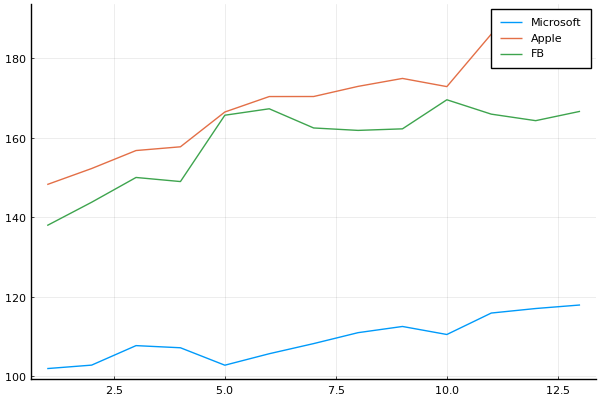

In [41]:
# Построение графика:
plot(T[!,:MSFT],label="Microsoft")
plot!(T[!,:AAPL],label="Apple")
plot!(T[!,:FB],label="FB")

In [42]:
# Данные о ценах на акции размещаем в матрице:
prices_matrix = Matrix(T)

13×3 Matrix{Any}:
 101.93  137.95  148.26
 102.8   143.8   152.29
 107.71  150.04  156.82
 107.17  149.01  157.76
 102.78  165.71  166.52
 105.67  167.33  170.41
 108.22  162.5   170.42
 110.97  161.89  172.97
 112.53  162.28  174.97
 110.51  169.6   172.91
 115.91  165.98  186.12
 117.05  164.34  191.05
 117.94  166.69  189.95

In [43]:
# Вычисление матрицы доходности за период времени:
M1 = prices_matrix[1:end-1,:]
M2 = prices_matrix[2:end,:]
# Матрица доходности:
R = (M2.-M1)./M1

12×3 Matrix{Float64}:
  0.00853527   0.0424067    0.027182
  0.0477626    0.0433936    0.0297459
 -0.00501346  -0.00686484   0.00599413
 -0.040963     0.112073     0.0555274
  0.0281183    0.00977611   0.0233606
  0.0241317   -0.0288651    5.8682e-5
  0.0254112   -0.00375385   0.014963
  0.0140579    0.00240904   0.0115627
 -0.0179508    0.0451072   -0.0117734
  0.0488644   -0.0213443    0.0763981
  0.00983522  -0.00988071   0.0264883
  0.00760359   0.0142996   -0.00575766

In [44]:
# Матрица рисков:
risk_matrix = cov(R)
# Проверка положительной определённости матрицы рисков:
isposdef(risk_matrix)

true

In [45]:
# Доход от каждой из компаний:
r = mean(R,dims=1)[:]

3-element Vector{Float64}:
 0.012532748705136572
 0.016563036855293173
 0.02114580465503291

In [46]:
# Вектор инвестиций:
x = Variable(length(r))

Variable
size: (3, 1)
sign: real
vexity: affine
id: 121…312

In [47]:
# Объект модели:
problem = minimize(Convex.quadform(x,risk_matrix),[sum(x)==1;r'*x>=0.02;x.>=0])

minimize
└─ * (convex; positive)
   ├─ 1
   └─ qol_elem (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ …
      └─ [1.0;;]
subject to
├─ == constraint (affine)
│  ├─ sum (affine; real)
│  │  └─ 3-element real variable (id: 121…312)
│  └─ 1
├─ >= constraint (affine)
│  ├─ * (affine; real)
│  │  ├─ [0.0125327 0.016563 0.0211458]
│  │  └─ 3-element real variable (id: 121…312)
│  └─ 0.02
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 121…312)
│  └─ 0
├─ >= constraint (affine)
│  ├─ index (affine; real)
│  │  └─ 3-element real variable (id: 121…312)
│  └─ 0
└─ >= constraint (affine)
   ├─ index (affine; real)
   │  └─ 3-element real variable (id: 121…312)
   └─ 0

status: `solve!` not called yet

In [48]:
# Находим решение:
solve!(problem, SCS.Optimizer)

------------------------------------------------------------------
	       SCS v3.2.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 6, constraints m: 14
cones: 	  z: primal zero / dual free vars: 2
	  l: linear vars: 5
	  q: soc vars: 7, qsize: 2
settings: eps_abs: 1.0e-004, eps_rel: 1.0e-004, eps_infeas: 1.0e-007
	  alpha: 1.50, scale: 1.00e-001, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-006
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 24, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0|1.71e+001 1.00e+000 1.62e+001 -8.03e+000 1.00e-001 2.46e-003 
    75|8.16e-005 1.46e-004 5.60e-005 5.56e-004 1.00e-001 2.51e-003 
------

In [49]:
sum(x.value)

0.9999994443731297

In [50]:
r'*x.value

1×1 adjoint(::Vector{Float64}) with eltype Float64:
 0.02001195936160116

In [51]:
x.value .* 1000

3×1 Matrix{Float64}:
  69.22834751660402
 117.301582202275
 813.4695146542507

## Восстановление изображения

In [52]:
# Подключение необходимых пакетов:
import Pkg
Pkg.add("ImageMagick")
Pkg.add("Convex")
Pkg.add("SCS")
using Images
using Convex
using SCS

   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Reachna\.julia\environments\v1.9\Manifest.toml`


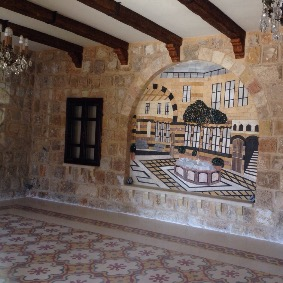

In [53]:
# Считывание исходного изображения:
Kref = load("data/khiam-small.jpg")

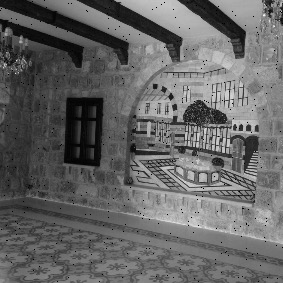

In [54]:
K = copy(Kref)
p = prod(size(K))
missingids = rand(1:p,400)
K[missingids] .= RGBX{N0f8}(0.0,0.0,0.0)
K
Gray.(K)

In [55]:
# Матрица цветов:
Y = Float64.(Gray.(K));

In [56]:
correctids = findall(Y[:].!=0)
X = Convex.Variable(size(Y))
problem = minimize(nuclearnorm(X))
problem.constraints += X[correctids]==Y[correctids]

1-element Vector{Constraint}:
 == constraint (affine)
├─ index (affine; real)
│  └─ 283×283 real variable (id: 159…846)
└─ 79690-element Vector{Float64}

In [57]:
# Находим решение:
solve!(problem, SCS.Optimizer())

------------------------------------------------------------------
	       SCS v3.2.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 240268, constraints m: 400047
cones: 	  z: primal zero / dual free vars: 239586
	  s: psd vars: 160461, ssize: 1
settings: eps_abs: 1.0e-004, eps_rel: 1.0e-004, eps_infeas: 1.0e-007
	  alpha: 1.50, scale: 1.00e-001, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-006
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 400330, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0|1.50e+001 9.96e-001 8.34e+003 1.76e+002 1.00e-001 8.40e-001 
   250|6.08e-004 2.05e-005 1.10e-005 4.46e+002 3.36e-001 8.52e+001 
   27

norm(float.(Gray.(Kref)) - X.value) = 1.1511800929439586
norm(-(X.value)) = 124.34122745625774


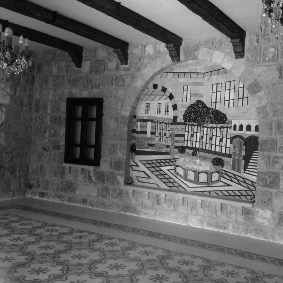

In [58]:
@show norm(float.(Gray.(Kref))-X.value)
@show norm(-X.value)
colorview(Gray, X.value)

##  Задания для самостоятельного выполнения

### Линейное программирование

In [59]:
# Определение объекта модели с именем model:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [60]:
@variable(model, 0 <= x1 <= 10)
@variable(model, x2 >= 0)
@variable(model, x3 >= 0)

x3

In [61]:
@constraint(model, -x1 + x2 + 3x3 <= -5)
@constraint(model, x1 + 3x2 - 7x3 <= 10)

x1 + 3 x2 - 7 x3 <= 10

In [62]:
@objective(model, Max, x1 + 2x2 + 5x3)

x1 + 2 x2 + 5 x3

In [63]:
optimize!(model)

In [64]:
termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [65]:
@show value(x1);
@show value(x2);
@show value(x3);

@show objective_value(model);

value(x1) = 10.0
value(x2) = 2.1875
value(x3) = 0.9375
objective_value(model) = 19.0625


###  Линейное программирование. Использование массивов

In [66]:
vector_model_2 = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [67]:
A = [-1 1 3;
    1 3 -7]
b = [-5; 10]
c = [1; 2; 5]

3-element Vector{Int64}:
 1
 2
 5

In [68]:
@variable(vector_model_2, x[1:3] >= 0)
set_upper_bound(x[1], 10)

In [69]:
@constraint(vector_model_2, A * x .== b)

2-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 -x[1] + x[2] + 3 x[3] == -5
 x[1] + 3 x[2] - 7 x[3] == 10

In [70]:
@objective(vector_model_2, Max, c' * x)

x[1] + 2 x[2] + 5 x[3]

In [71]:
optimize!(vector_model_2)

In [72]:
termination_status(vector_model_2)

OPTIMAL::TerminationStatusCode = 1

In [73]:
@show value(x1);
@show value(x2);
@show value(x3);

@show objective_value(vector_model_2);

value(x1) = 10.0
value(x2) = 2.1875
value(x3) = 0.9375
objective_value(vector_model_2) = 19.0625


###  Выпуклое программирование

In [74]:
using Convex
using SCS

In [75]:
m = 5
n = 4

A = rand(m, n)
b = rand(m)

display(A)
println()
display(b)

5×4 Matrix{Float64}:
 0.849155  0.936487  0.74695   0.513831
 0.401326  0.875853  0.874495  0.631306
 0.800074  0.526601  0.666555  0.145633
 0.483516  0.305902  0.636353  0.582247
 0.336612  0.354855  0.968644  0.92455

5-element Vector{Float64}:
 0.45183142669440834
 0.6667329596934422
 0.7275304988925214
 0.8926481804606815
 0.3173554782366863

In [76]:
x = Variable(n)
display(x)

Variable
size: (4, 1)
sign: real
vexity: affine
id: 173…816

In [77]:
model = minimize(Convex.sumsquares(A*x - b), [x >= 0])

minimize
└─ qol_elem (convex; positive)
   ├─ norm2 (convex; positive)
   │  └─ + (affine; real)
   │     ├─ …
   │     └─ …
   └─ [1.0;;]
subject to
└─ >= constraint (affine)
   ├─ 4-element real variable (id: 173…816)
   └─ 0

status: `solve!` not called yet

In [78]:
solve!(model, SCS.Optimizer)

------------------------------------------------------------------
	       SCS v3.2.4 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 7, constraints m: 15
cones: 	  z: primal zero / dual free vars: 1
	  l: linear vars: 5
	  q: soc vars: 9, qsize: 2
settings: eps_abs: 1.0e-004, eps_rel: 1.0e-004, eps_infeas: 1.0e-007
	  alpha: 1.50, scale: 1.00e-001, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-006
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 30, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0|1.71e+001 1.00e+000 1.62e+001 -8.04e+000 1.00e-001 7.85e-005 
   125|4.22e-007 3.39e-007 1.28e-006 3.04e-001 7.57e-001 1.63e-004 
------

In [79]:
model.status

OPTIMAL::TerminationStatusCode = 1

In [80]:
model.optval

0.30435506756440117

###  Оптимальная рассадка по залам

In [81]:
using JuMP
using GLPK

# Заданные параметры
num_sections = 5
num_rooms = 5
min_capacity = 180
max_capacity = 250
target_capacity = 220
num_participants = 1000

# Генерация случайных приоритетов для слушателей
using Random
Random.seed!(42)
priorities = rand(1:3, num_participants, num_sections)

# Создание модели оптимизации
model = Model(optimizer_with_attributes(GLPK.Optimizer, "msg_lev" => GLPK.GLP_MSG_ALL))

# Переменные решения: x[i, j] = 1, если слушатель i посещает секцию j
@variable(model, x[1:num_participants, 1:num_sections], Bin)

# Условия для вместимости залов
room_capacities = [200, 210, 220, 230, 240]  # Пример вместимости залов
for j in 1:num_rooms
    @constraint(model, sum(x[i, j] for i in 1:num_participants) <= room_capacities[j])
end

# Условие, чтобы у каждого слушателя была одна и только одна секция с максимальным приоритетом
for i in 1:num_participants
    @constraint(model, sum(x[i, :]) == 1)
end

# Условия для учета приоритетов
for j in 1:num_sections
    for k in 1:3
        @constraint(model, sum(x[i, j] for i in findall(priorities[:, j] .== k)) == 0)
    end
end

# Условие для третьей секции, где нужно ровно 220 человек
@constraint(model, sum(x[i, 3] for i in 1:num_participants) == target_capacity)

# Функция цели: максимизация общего числа посетителей
@objective(model, Max, sum(x))

# Решение задачи
optimize!(model)

# Вывод результатов
println("Status: ", termination_status(model))

if termination_status(model) == MOI.OPTIMAL
    println("Objective value: ", objective_value(model))

    allocation = argmax(value.(x), dims=2)
    for i in 1:num_participants
        println("Слушатель $i посещает секцию $(allocation[i])")
    end
else
    println("Решение не найдено")
end

GLPK Simplex Optimizer 5.0
1021 rows, 5000 columns, 16000 non-zeros
      0: obj = -0.000000000e+000 inf =  1.220e+003 (1001)
     15: obj = -0.000000000e+000 inf =  1.220e+003 (1001)
LP HAS NO PRIMAL FEASIBLE SOLUTION
GLPK Integer Optimizer 5.0
1021 rows, 5000 columns, 16000 non-zeros
5000 integer variables, all of which are binary
Preprocessing...
PROBLEM HAS NO PRIMAL FEASIBLE SOLUTION
Status: INFEASIBLE
Решение не найдено


###  План приготовления кофе

In [82]:
using JuMP
using GLPK

In [83]:
coffee_type = ["Raf coffee", "Capuccino"]

balance_data = JuMP.Containers.DenseAxisArray(
    [40 140 5;
    30 120 0],
    coffee_type,
    ["beans", "milk", "sugar"])

2-dimensional DenseAxisArray{Int64,2,...} with index sets:
    Dimension 1, ["Raf coffee", "Capuccino"]
    Dimension 2, ["beans", "milk", "sugar"]
And data, a 2×3 Matrix{Int64}:
 40  140  5
 30  120  0

In [84]:
coffee_data = JuMP.Containers.DenseAxisArray(
    [0 500;
    0 2000;
    40 40],
    ["beans", "milk", "sugar"],
    ["min", "max"])

2-dimensional DenseAxisArray{Int64,2,...} with index sets:
    Dimension 1, ["beans", "milk", "sugar"]
    Dimension 2, ["min", "max"]
And data, a 3×2 Matrix{Int64}:
  0   500
  0  2000
 40    40

In [85]:
price_coffee = JuMP.Containers.DenseAxisArray([400, 300], coffee_type)

1-dimensional DenseAxisArray{Int64,1,...} with index sets:
    Dimension 1, ["Raf coffee", "Capuccino"]
And data, a 2-element Vector{Int64}:
 400
 300

In [86]:
ingredients = ["beans", "milk", "sugar"]

3-element Vector{String}:
 "beans"
 "milk"
 "sugar"

In [87]:
model = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

In [88]:
# Определение переменных:
@variables(model, 
    begin coffee_data[i, "min"] <= nutrition[i = ingredients] <= coffee_data[i, "max"]
        # Сколько использовать продуктов:
        use[coffee_type] >= 0
    end)

(1-dimensional DenseAxisArray{VariableRef,1,...} with index sets:
    Dimension 1, ["beans", "milk", "sugar"]
And data, a 3-element Vector{VariableRef}:
 nutrition[beans]
 nutrition[milk]
 nutrition[sugar], 1-dimensional DenseAxisArray{VariableRef,1,...} with index sets:
    Dimension 1, ["Raf coffee", "Capuccino"]
And data, a 2-element Vector{VariableRef}:
 use[Raf coffee]
 use[Capuccino])

In [89]:
# Определение целевой функции:
@objective(model, Max, sum(price_coffee[c] * use[c] for c in coffee_type))

400 use[Raf coffee] + 300 use[Capuccino]

In [90]:
# Определение ограничений модели:
@constraint(model, [i in ingredients],
    sum(balance_data[c, i] * use[c] for c in coffee_type) == nutrition[i])

1-dimensional DenseAxisArray{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape},1,...} with index sets:
    Dimension 1, ["beans", "milk", "sugar"]
And data, a 3-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 -nutrition[beans] + 40 use[Raf coffee] + 30 use[Capuccino] == 0
 -nutrition[milk] + 140 use[Raf coffee] + 120 use[Capuccino] == 0
 -nutrition[sugar] + 5 use[Raf coffee] == 0

In [91]:
# Вызов функции оптимизации:
JuMP.optimize!(model)
term_status = JuMP.termination_status(model)

OPTIMAL::TerminationStatusCode = 1

In [92]:
hcat(use.data,JuMP.value.(use.data))

2×2 Matrix{AffExpr}:
 use[Raf coffee]  8
 use[Capuccino]   6